In [1]:
from pyspark import SparkConf, SparkContext

In [2]:
# conf 지정
conf = SparkConf().setMaster("local").setAppName("transformations_actions")

In [3]:
sc = SparkContext(conf = conf)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
2022-08-23 13:57:54,188 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
# 우리가 쓰고있는 설정들을 리스트로 쭉 뽑아볼 수 있음.
sc.getConf().getAll()

[('spark.master', 'local'),
 ('spark.app.startTime', '1661230674061'),
 ('spark.driver.host', '10.186.33.42'),
 ('spark.driver.port', '53453'),
 ('spark.rdd.compress', 'True'),
 ('spark.app.id', 'local-1661230675395'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.submit.pyFiles', ''),
 ('spark.executor.id', 'driver'),
 ('spark.app.name', 'transformations_actions'),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true')]

In [5]:
# spark context를 준단하고 깊다면 아래 코드
# 그거면 전에 만들어둔 sc가 없어진 상태가 됨.
sc.stop()

In [6]:
sc = SparkContext(conf=conf)

In [7]:
# parallelize도 RDD를 만드는데 쓰임.

foods = sc.parallelize(["짜장면", "마라탕", "짬뽕", "떡볶이", "쌀국수", "짬뽕", "짜장면", "짜장면", "짜장면",  "라면", "우동", "라면"])

In [8]:
foods

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:274

In [9]:
# collect를 찍어줘야 볼 수 있음
# collect()를 쓰면 RDD 안에 있는 모든 데이터를 가져올 수 있는데, 실제 개발할 때에는 지양해야함. 모든 데이터를 가져오기 때문에 자원을 너무 낭비 -> 스파크를 쓰는 의미가 없어짐.
foods.collect()

['짜장면', '마라탕', '짬뽕', '떡볶이', '쌀국수', '짬뽕', '짜장면', '짜장면', '짜장면', '라면', '우동', '라면']

In [10]:
foods.countByValue()

defaultdict(int,
            {'짜장면': 4,
             '마라탕': 1,
             '짬뽕': 2,
             '떡볶이': 1,
             '쌀국수': 1,
             '라면': 2,
             '우동': 1})

In [11]:
foods.take(3)

['짜장면', '마라탕', '짬뽕']

In [12]:
foods.take(5)

['짜장면', '마라탕', '짬뽕', '떡볶이', '쌀국수']

In [13]:
foods.first()

'짜장면'

In [14]:
# 총 12개 중에
foods.count()

12

In [15]:
 # unique한 값은 7개
foods.distinct().count()

/usr/local/spark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling


7

In [16]:
# foreach: RDD에 연산을 하고 log를 어디엔가 저장해놓을 때 유용함.

In [61]:
# 이 코드를 실행시 드라이버 프로그램에서는 아무런 결과도 내놓지 않음. 왜?
# foreach가 액션이기 때문에 드라이버 아닌 바로 Excution에서 실행되기 때문
foods.foreach(lambda x: print(x))

짜장면
마라탕
짬뽕
떡볶이
쌀국수
짬뽕
짜장면
짜장면
짜장면
라면
우동
라면
치킨
돈까스
회
햄버거
피자


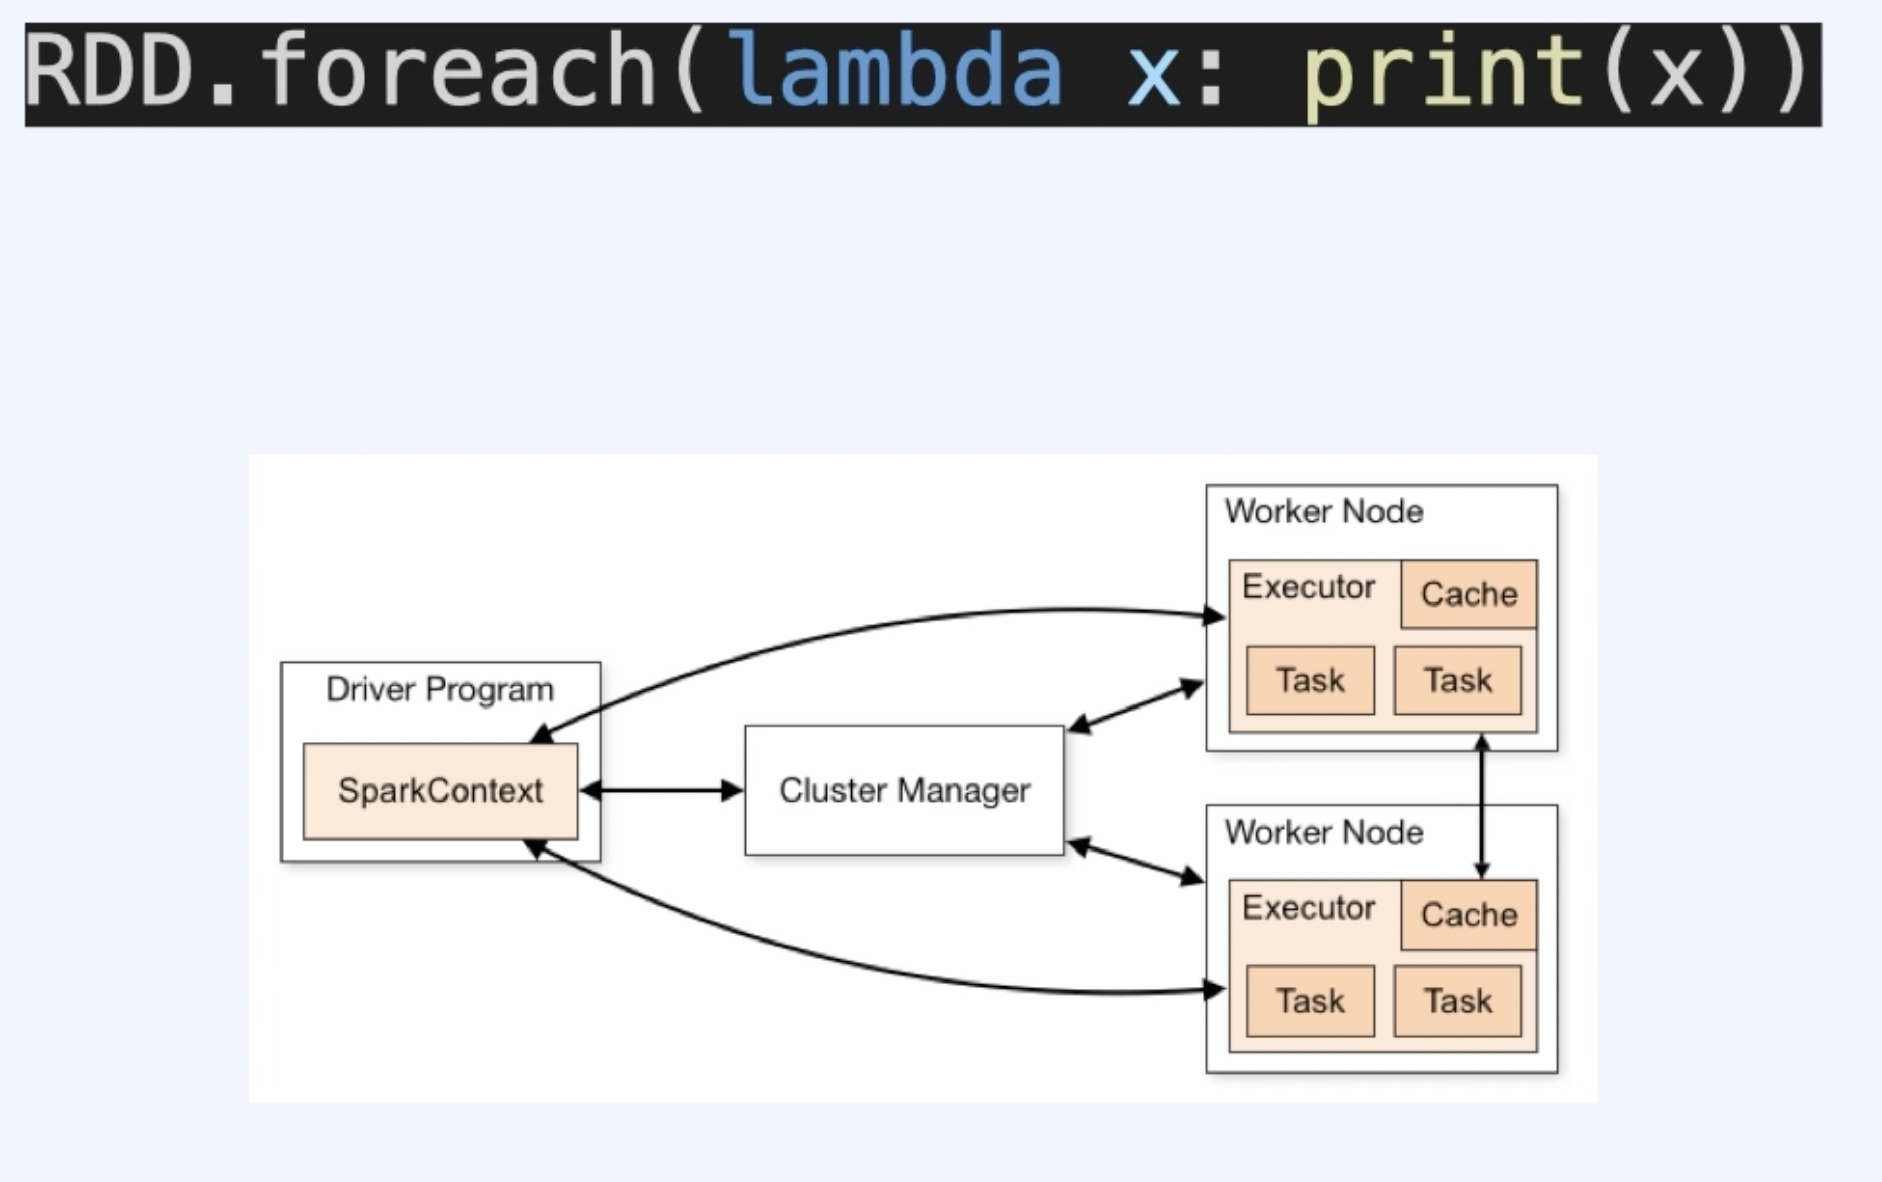

## transfromation은 output이 RDD임.

In [18]:
sc.parallelize([1, 2, 3]).map(lambda x: x + 2)

PythonRDD[13] at RDD at PythonRDD.scala:53

In [19]:
sc.parallelize([1, 2, 3]).map(lambda x: x + 2).collect()

[3, 4, 5]

In [20]:
sc.parallelize([1, 2, 3]).map(lambda x: x * 2).collect()

[2, 4, 6]

In [21]:
movies = [
    "그린 북",
    "매트릭스",
    "토이 스토리",
    "캐스트 어웨이",
    "포드 V 페라리",
    "보헤미안 랩소디",
    "빽 투 더 퓨처",
    "반지의 제왕",
    "죽은 시인의 사회"
]

In [22]:
# list를 RDD로 만들기 위해서 parallelize 함수를 쓰면됨.
moviesRDD = sc.parallelize(movies)

In [23]:
moviesRDD.collect()

['그린 북',
 '매트릭스',
 '토이 스토리',
 '캐스트 어웨이',
 '포드 V 페라리',
 '보헤미안 랩소디',
 '빽 투 더 퓨처',
 '반지의 제왕',
 '죽은 시인의 사회']

In [24]:
flatMovies = moviesRDD.flatMap(lambda x: x.split(" "))

In [25]:
flatMovies.collect()

['그린',
 '북',
 '매트릭스',
 '토이',
 '스토리',
 '캐스트',
 '어웨이',
 '포드',
 'V',
 '페라리',
 '보헤미안',
 '랩소디',
 '빽',
 '투',
 '더',
 '퓨처',
 '반지의',
 '제왕',
 '죽은',
 '시인의',
 '사회']

In [26]:
# 매트릭스를 뺴고 전부 다 추출하라.
filteredMovies = flatMovies.filter(lambda x: x != "매트릭스")

In [27]:
filteredMovies.collect()

['그린',
 '북',
 '토이',
 '스토리',
 '캐스트',
 '어웨이',
 '포드',
 'V',
 '페라리',
 '보헤미안',
 '랩소디',
 '빽',
 '투',
 '더',
 '퓨처',
 '반지의',
 '제왕',
 '죽은',
 '시인의',
 '사회']

In [28]:
num1 = sc.parallelize([1, 2, 3, 4])
num2 = sc.parallelize([4, 5, 6, 7, 8, 9, 10])

In [29]:
# intersection: 교집합
num1.intersection(num2).collect()

/usr/local/spark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling


[4]

In [30]:
# union : 합집합
num1.union(num2).collect()

[1, 2, 3, 4, 4, 5, 6, 7, 8, 9, 10]

In [31]:
# num1에서 num2를 차집합
num1.subtract(num2).collect()

[2, 1, 3]

In [32]:
numUnion = num1.union(num2)

In [33]:
numUnion.collect()

[1, 2, 3, 4, 4, 5, 6, 7, 8, 9, 10]

In [34]:
# numUnion.sample(T)
# [1, 2, 3, 4, 4, 5, 6, 7, 8, 9, 10]
# seed를 지정해주지 않으면 리스트의 길이를 보장해주지 않음. 항상 다른 길이의 리스트를 반환함.
numUnion.sample(True, .5).collect()


[4, 5, 5, 6, 9]

In [35]:
# sample로 무작위 추출. seed = 5는 원래 리스트 사이즈의 0.5만큼
numUnion.sample(True, .5, seed=5).collect()


[1, 4, 6, 9, 9, 10]

In [62]:
foods = sc.parallelize(["짜장면", "마라탕", "짬뽕", "떡볶이", "쌀국수", "짬뽕", "짜장면", "짜장면", "짜장면",  "라면", "우동", "라면", "치킨", "돈까스", "회", "햄버거", "피자"])

In [69]:
# take(n) 액션: RDD의 요소 중 맨 앞 n개만 가져오는 액션
# 이 때 three라는 결과 값은 드라이버 프로그램에 저장됨.
three = foods.take(3)
three

['짜장면', '마라탕', '짬뽕']

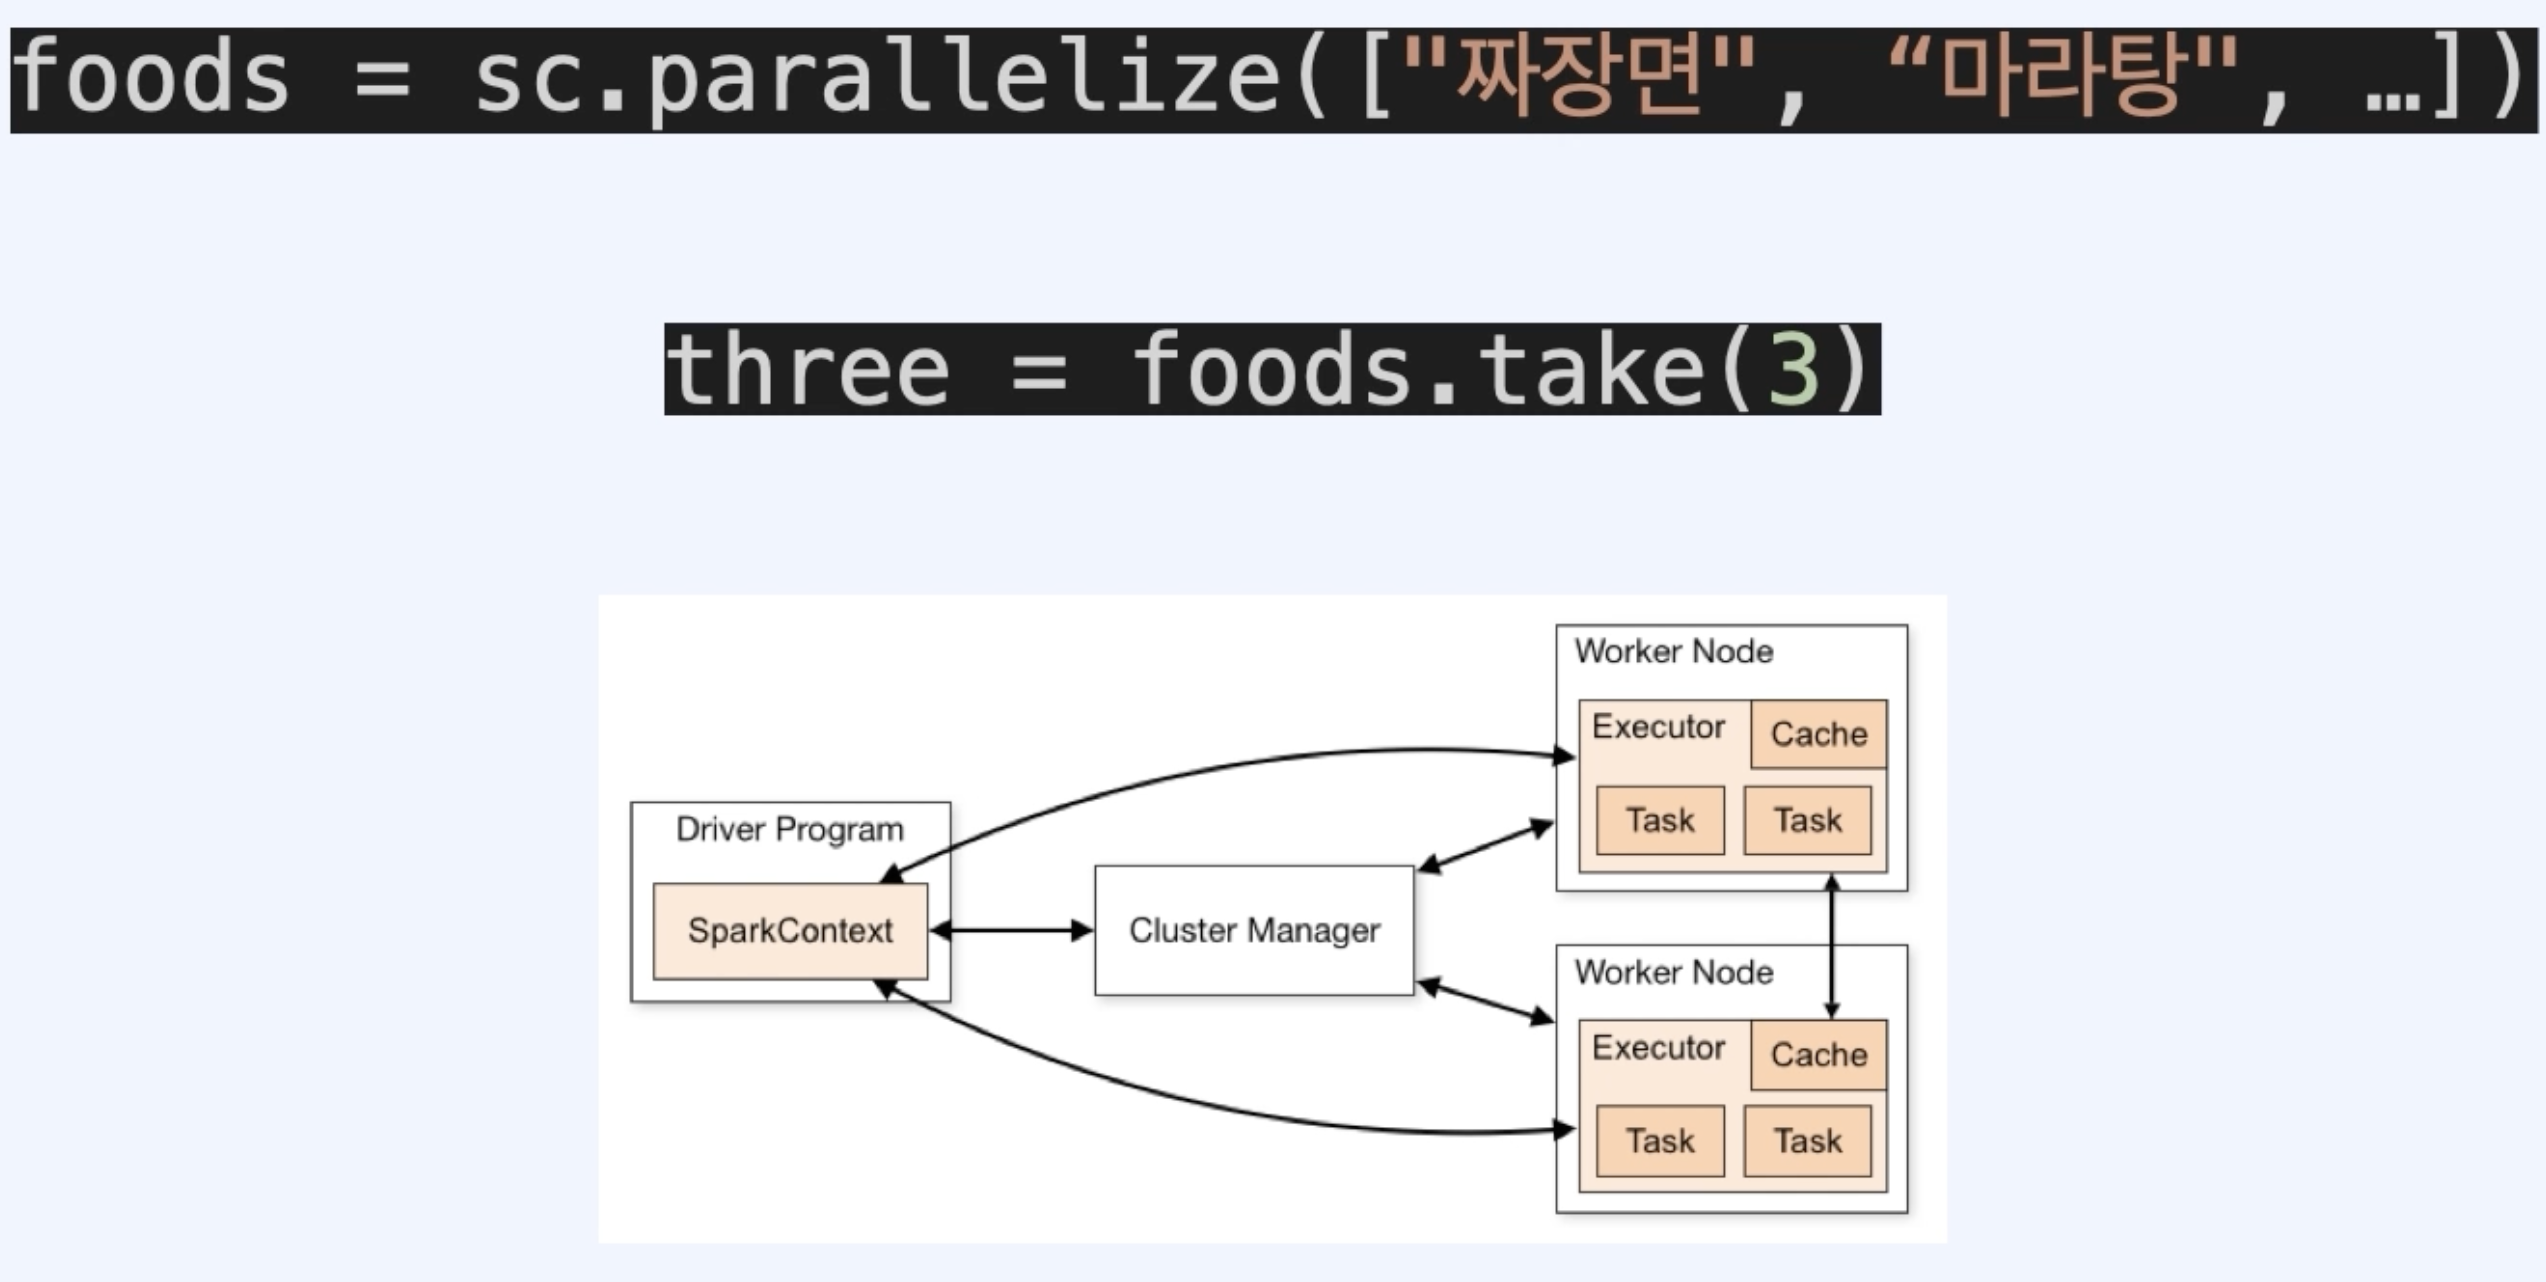  
결국 excutor에게 take 컴퓨테이션을 수행하라고 명령하고 그 다음 드라이버에 노드에게 돌려달라고 요청하는 것.  
RDD를 효율적으로 사용하기 위해서는 RDD가 뒷단에서 어떻게 돌아갈지 이해하며 코딩하는 것이 중요
함.

In [37]:
# groupBy: 무엇을 기준으로 group화

In [38]:
# 첫번째 요소를 기준으로 groupping
foodsGroup = foods.groupBy(lambda x: x[0])

In [39]:
res = foodsGroup.collect()

In [40]:
for (k, v) in res:
    print(k, list(v))

짜 ['짜장면', '짜장면', '짜장면', '짜장면']
마 ['마라탕']
짬 ['짬뽕', '짬뽕']
떡 ['떡볶이']
쌀 ['쌀국수']
라 ['라면', '라면']
우 ['우동']
치 ['치킨']
돈 ['돈까스']
회 ['회']
햄 ['햄버거']
피 ['피자']


In [44]:
nums = sc.parallelize([1,2,3,4,5,6,7,8,9,10])

In [58]:
# 나머지 값이 1인 경우와 0인 경우 2가지의 경우를 나타냄
nums.groupBy(lambda x: x % 2).collect()

[(1, <pyspark.resultiterable.ResultIterable at 0x7ff6f1b6cb20>),
 (0, <pyspark.resultiterable.ResultIterable at 0x7ff6f1b2e820>)]

In [60]:
# 첫번째 값(나머지가 1인경우)의 값(value) 보기
# list로 감싸줘야 값을 볼 수 있음.
list(nums.groupBy(lambda x: x % 2).collect()[0][1])

[1, 3, 5, 7, 9]

In [63]:
# x가 2로 나뉘는지 아닌지를 기준으로 groupping
# 2로 나눈 나머지가 1일때: 홀수
print(list(nums.groupBy(lambda x: x % 2).collect()[0][1]))

# 2로 나눈 나머지가 2일 때: 짝수
print(list(nums.groupBy(lambda x: x % 2).collect()[1][1]))

[1, 3, 5, 7, 9]
[2, 4, 6, 8, 10]
